### converting image training data into csv format

In [12]:
import os
import csv
path = r"E:\\computer vision\\practical-cv\\dataset\\train\\"
rows = []
for folders in os.listdir(path):
    for files in os.listdir(path + folders):
        if files.endswith('.jpg'):
            rows.append([path + folders + '/' + files, folders])

In [16]:
csv_file_path = r'E:\\computer vision\\practical-cv\\dataset\\train_csv.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_path', 'label'])
    writer.writerows(rows)



### converting test data into csv format

In [20]:
path = r"E:\\computer vision\\practical-cv\\dataset\\test\\"
rowss = []
for files in os.listdir(path):
    if files.endswith(".jpg"):
        rowss.append([path + files, ""])

In [21]:
csv_file_path = r'E:\computer vision\practical-cv\dataset\test_csv.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['image_path', 'label'])
    writer.writerows(rowss)

In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)

CLASS_NAMES = [item.numpy().decode("utf-8") for item in 
               tf.strings.regex_replace(
                 tf.io.gfile.glob(r"E:\\computer vision\\practical-cv\\dataset\\train/*"),
                 r'E:\\computer vision\\practical-cv\\dataset\\train/', "")]
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available classes:", CLASS_NAMES)



These are the available classes: ['E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy', 'E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\dandelion', 'E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\rose', 'E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\sunflower', 'E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\tulip']


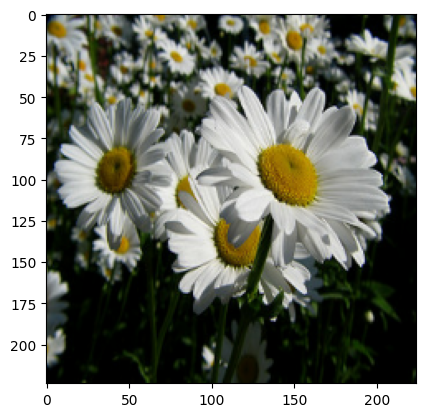

In [2]:
file = r'e:\\computer vision\\practical-cv\\dataset\\train\\daisy\\2488902131_3417698611_n.jpg'
# read_and_decode(file, [IMG_HEIGHT, IMG_WIDTH])
def show_image(filename):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  plt.imshow((img.numpy()));

show_image(file)

E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy\10140303196_b88d3d6cec.jpg
E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy\10172379554_b296050f82_n.jpg
E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy\10172567486_2748826a8b.jpg
E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy\10172636503_21bededa75_n.jpg
E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy\10391248763_1d16681106_n.jpg


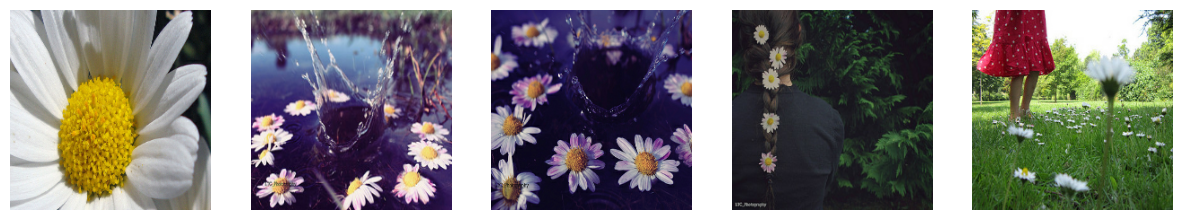

In [3]:
tulips = tf.io.gfile.glob(r"E:\\\\computer vision\\\\practical-cv\\\\dataset\\\\train\\daisy/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate(tulips[:5]):
  print(filename)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].axis('off')

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  # label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label_string

dataset = (tf.data.TextLineDataset(
    "E:\\computer vision\\practical-cv\\dataset\\train_csv.csv").map(decode_csv))

for img, label in dataset.take(1):
  avg = tf.math.reduce_mean(img, axis=[0, 1]) # average pixel in the image
  print(label, avg)

tf.Tensor(b'daisy', shape=(), dtype=string) tf.Tensor([0.6474569  0.6199989  0.50390774], shape=(3,), dtype=float32)


In [6]:
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

In [8]:
train_dataset = (tf.data.TextLineDataset(
    "E:\\computer vision\\practical-cv\\dataset\\train_csv.csv").
    map(decode_csv)).batch(3)

In [12]:
test_dataset = (tf.data.TextLineDataset(
    "E:\\computer vision\\practical-cv\\dataset\\val.csv").
    map(decode_csv)).batch(3)

In [13]:
# linear model
model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=1)

916/916 [==============================] - 38s 40ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


## Neural Network


In [7]:
BATCH_SIE = 3

train_dataset = (tf.data.TextLineDataset(
    "E:\\computer vision\\practical-cv\\dataset\\train_csv.csv").
    map(decode_csv)).batch(BATCH_SIE)

test_dataset = (tf.data.TextLineDataset(
    "E:\\computer vision\\practical-cv\\dataset\\val.csv").
    map(decode_csv)).batch(BATCH_SIE)


In [10]:
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
          tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=test_dataset, epochs=2)

Epoch 1/2
916/916 [==============================] - 477s 516ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
916/916 [==============================] - 370s 404ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
